## Balance Data

In [569]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
import lazypredict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, f1_score, recall_score, balanced_accuracy_score, precision_score

In [570]:
data= pd.read_csv('heart_data_cleaned.csv')

In [571]:
data.shape

(246022, 40)

In [572]:
data.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,1,2,2,4.00,0.00,1,1,9.00,4,2,...,1.60,71.67,27.99,2,2,1,1,1,2,2
1,1,1,2,0.00,0.00,1,1,6.00,4,2,...,1.78,95.25,30.13,2,2,1,1,3,2,2
2,1,1,2,0.00,0.00,1,2,8.00,2,2,...,1.85,108.86,31.66,1,2,2,1,4,2,1
3,1,2,4,5.00,0.00,1,1,9.00,4,2,...,1.70,90.72,31.32,2,2,1,1,4,2,1
4,1,2,3,3.00,15.00,1,1,5.00,1,2,...,1.55,79.38,33.07,2,2,1,1,4,2,2


In [573]:
data.isna().sum()

State                        0
Sex                          0
GeneralHealth                0
PhysicalHealthDays           0
MentalHealthDays             0
LastCheckupTime              0
PhysicalActivities           0
SleepHours                   0
RemovedTeeth                 0
HadHeartAttack               0
HadAngina                    0
HadStroke                    0
HadAsthma                    0
HadSkinCancer                0
HadCOPD                      0
HadDepressiveDisorder        0
HadKidneyDisease             0
HadArthritis                 0
HadDiabetes                  0
DeafOrHardOfHearing          0
BlindOrVisionDifficulty      0
DifficultyConcentrating      0
DifficultyWalking            0
DifficultyDressingBathing    0
DifficultyErrands            0
SmokerStatus                 0
ECigaretteUsage              0
ChestScan                    0
RaceEthnicityCategory        0
AgeCategory                  0
HeightInMeters               0
WeightInKilograms            0
BMI     

In [574]:
data.shape

(246022, 40)

In [575]:
data['HadHeartAttack'].value_counts()

2    232587
1     13435
Name: HadHeartAttack, dtype: int64

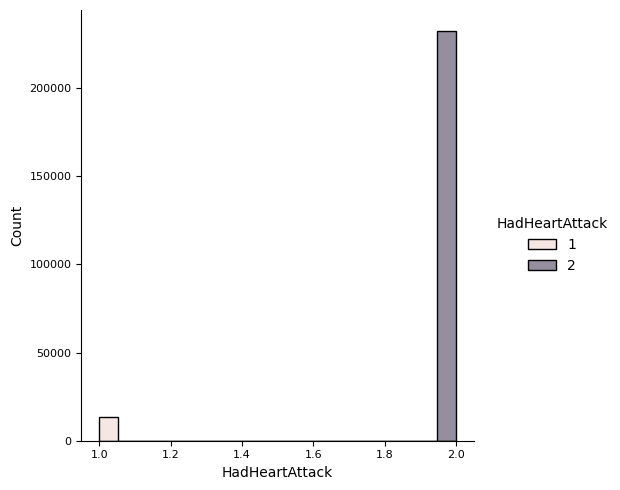

In [576]:
sn.displot(data, x="HadHeartAttack", hue='HadHeartAttack')

In [577]:
no_ha = data.loc[data['HadHeartAttack'] == 1]
ha = data.loc[data['HadHeartAttack'] == 2].sample(n = 13435, random_state=33)
frames = [ha,no_ha]
data = pd.concat(frames)

In [578]:
data.shape

(26870, 40)

In [579]:
data['HadHeartAttack'].value_counts()

2    13435
1    13435
Name: HadHeartAttack, dtype: int64

In [580]:
data

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
136294,31,1,2,0.00,0.00,1,1,7.00,4,2,...,1.73,83.91,28.13,1,2,1,1,4,2,2
14104,5,2,1,0.00,0.00,1,1,8.00,4,2,...,1.52,40.82,17.58,2,2,2,2,1,2,1
69633,17,1,2,1.00,1.00,1,1,7.00,1,2,...,1.83,92.99,27.80,1,1,2,2,3,2,2
107477,24,1,2,0.00,0.00,4,1,6.00,4,2,...,1.78,92.99,29.41,2,1,2,2,4,2,2
150884,33,2,2,0.00,0.00,1,1,9.00,4,2,...,1.55,97.52,40.62,2,2,1,2,4,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245922,54,2,4,0.00,0.00,1,2,6.00,2,1,...,1.55,63.50,26.45,1,2,2,1,1,2,2
245943,54,1,4,0.00,0.00,2,1,8.00,4,1,...,1.88,117.93,33.38,2,1,2,2,3,2,2
246012,54,1,4,7.00,30.00,1,2,4.00,4,1,...,1.88,117.93,33.38,1,1,2,2,4,2,1
246016,54,1,3,0.00,0.00,1,2,6.00,1,1,...,1.80,118.84,36.54,1,1,1,2,3,2,2


In [581]:
N=13435*2
data=data.sample(n = N, random_state=33)

In [582]:
data['HadHeartAttack'].value_counts()

1    13435
2    13435
Name: HadHeartAttack, dtype: int64

In [583]:
data[0:10]

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
52276,13,1,4,0.00,0.00,1,1,8.00,3,1,...,1.78,117.93,37.31,2,2,1,1,1,2,2
8733,3,1,3,0.00,0.00,1,2,7.00,2,1,...,1.68,85.73,30.51,1,2,2,1,4,2,2
181315,41,2,2,3.00,0.00,1,1,8.00,4,1,...,1.68,79.38,28.25,2,2,1,1,4,2,2
74042,18,2,3,0.00,30.00,1,1,8.00,2,1,...,1.68,65.77,23.40,2,1,1,2,3,2,2
143498,33,1,3,1.00,0.00,1,1,7.00,2,1,...,1.80,83.46,25.66,1,1,1,1,1,2,2
125217,27,2,2,0.00,0.00,2,1,7.00,4,2,...,1.65,70.31,25.79,2,2,1,2,4,2,2
234943,50,1,2,2.00,0.00,1,1,7.00,4,1,...,1.80,72.57,22.32,1,1,1,1,1,2,2
226715,48,1,2,0.00,0.00,3,2,7.00,4,2,...,1.75,151.95,49.47,1,2,2,2,4,2,1
192327,44,2,2,0.00,5.00,4,1,7.00,2,2,...,1.75,92.53,30.13,2,1,2,2,4,2,2
241539,52,2,4,0.00,5.00,1,1,5.00,1,2,...,1.70,94.80,32.73,1,1,2,2,4,1,2


## Heatmap

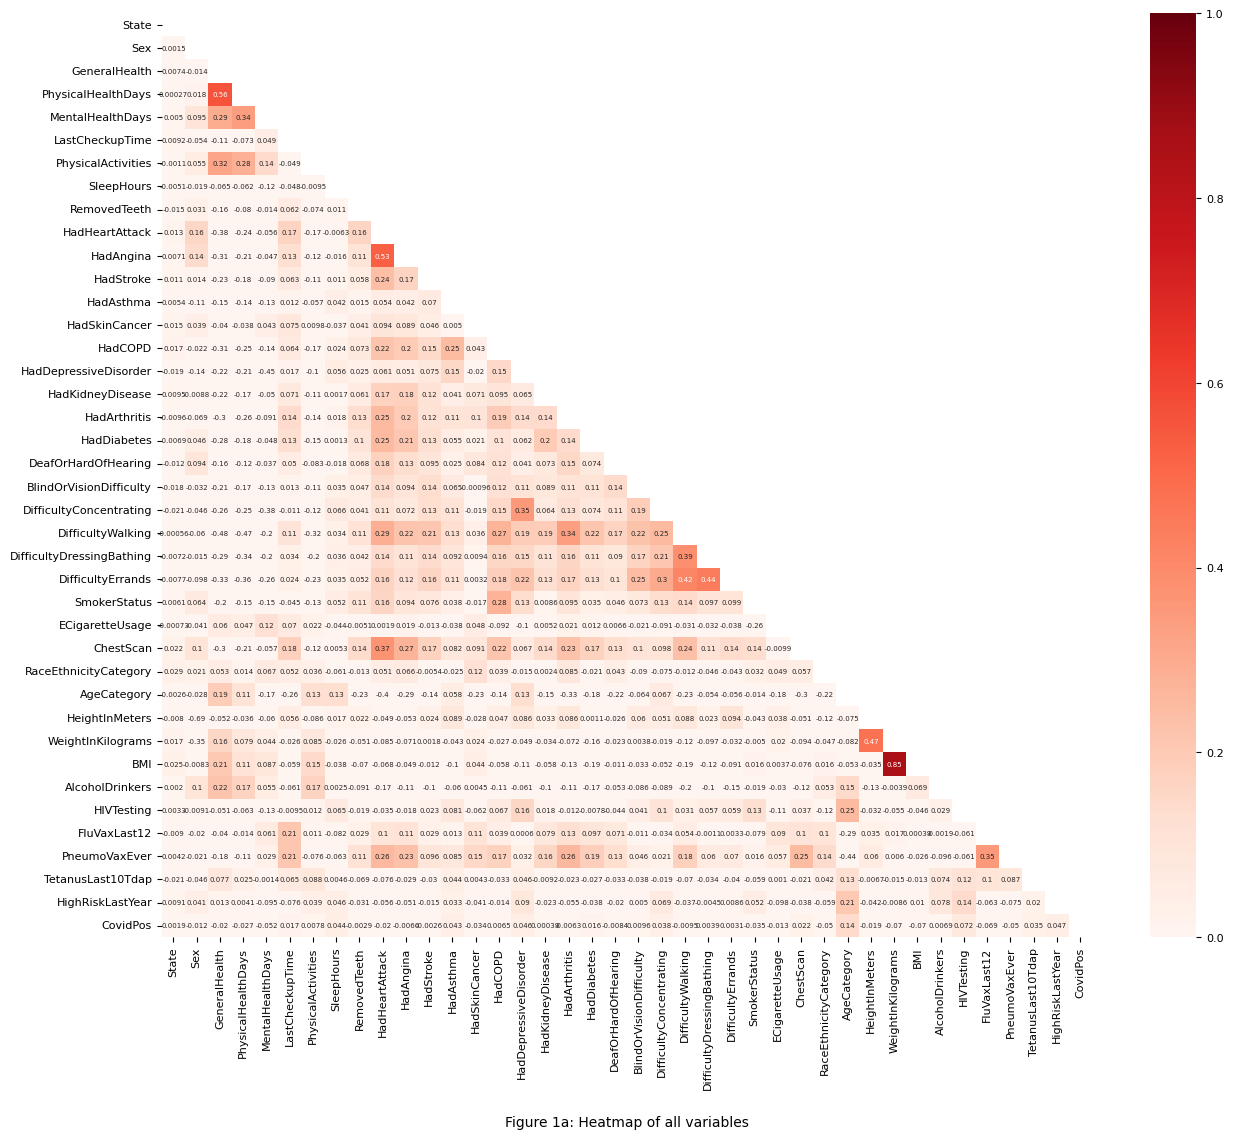

In [584]:
plt.rc('xtick', labelsize=8)   # fontsize of the tick labels
plt.rc('ytick', labelsize=8)  # fontsize of the tick labels
plt.figure(figsize=(15, 12))

plt.annotate('Figure 1a: Heatmap of all variables',
            xy = (0.5, -0.2),
            xycoords='axes fraction',
            ha='center',
            va="center",
            fontsize=10)

# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(data.corr(), dtype=np.bool))
heatmap = sn.heatmap(data.corr(), mask=mask, vmin=0, vmax=1, annot=True, cmap='Reds', annot_kws={"size": 5})

In [585]:
data['HadHeartAttack'].value_counts()

1    13435
2    13435
Name: HadHeartAttack, dtype: int64

## ANOVA F-Test

In [586]:
Data= data
Predictors= Data.loc[:, Data.columns!='HadHeartAttack']
Labels= Data.iloc[:,9]
x_train, x_test, y_train, y_test= train_test_split(Predictors, Labels, test_size=0.85)

In [587]:
Predictors

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadAngina,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
52276,13,1,4,0.00,0.00,1,1,8.00,3,1,...,1.78,117.93,37.31,2,2,1,1,1,2,2
8733,3,1,3,0.00,0.00,1,2,7.00,2,1,...,1.68,85.73,30.51,1,2,2,1,4,2,2
181315,41,2,2,3.00,0.00,1,1,8.00,4,2,...,1.68,79.38,28.25,2,2,1,1,4,2,2
74042,18,2,3,0.00,30.00,1,1,8.00,2,1,...,1.68,65.77,23.40,2,1,1,2,3,2,2
143498,33,1,3,1.00,0.00,1,1,7.00,2,1,...,1.80,83.46,25.66,1,1,1,1,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112226,24,2,1,0.00,0.00,3,1,7.00,4,2,...,1.68,53.07,18.88,2,1,2,2,3,2,2
27935,7,2,3,7.00,25.00,1,1,9.00,1,2,...,1.73,85.73,28.74,2,2,2,2,4,2,1
106758,24,2,3,0.00,0.00,1,1,5.00,4,2,...,1.60,88.45,34.54,2,2,1,2,1,2,2
53219,13,1,4,0.00,0.00,1,1,7.00,2,2,...,1.83,124.74,37.30,1,2,2,2,2,2,2


In [588]:
Labels

52276     1
8733      1
181315    1
74042     1
143498    1
         ..
112226    2
27935     2
106758    2
53219     2
184028    1
Name: HadHeartAttack, Length: 26870, dtype: int64

In [589]:
x_train_anova=x_train
x_test_anova=x_test
y_train_anova=y_train
y_test_anova=y_test

In [590]:
x_test_anova

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadAngina,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
113069,24,2,3,0.00,2.00,1,2,6.00,3,2,...,1.45,72.57,34.62,2,2,2,1,2,2,2
213288,47,2,3,2.00,0.00,1,1,8.00,1,2,...,1.73,122.47,41.05,1,2,2,2,1,2,1
36785,10,2,2,7.00,0.00,1,2,6.00,4,2,...,1.65,113.40,41.60,2,2,1,2,1,2,2
158096,36,1,3,2.00,2.00,1,1,9.00,1,2,...,1.78,68.95,21.81,2,2,2,1,2,2,2
139840,31,2,3,0.00,5.00,1,2,5.00,1,2,...,1.65,68.04,24.96,1,1,1,2,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4866,2,2,1,0.00,0.00,1,1,8.00,4,2,...,1.70,55.34,19.11,1,1,1,2,2,2,2
189765,43,1,5,30.00,2.00,3,2,8.00,3,2,...,1.83,58.97,17.63,2,2,2,2,4,2,2
176114,40,2,3,30.00,5.00,1,2,10.00,1,2,...,1.68,60.33,21.47,2,2,2,1,4,2,1
86698,21,1,2,0.00,0.00,1,2,7.00,3,2,...,1.73,63.50,21.29,2,2,1,1,1,2,2


In [591]:
anovaFTest=SelectKBest(score_func=f_classif, k=10)
anovaFTest.fit(x_train_anova, y_train_anova)
anovaFTest.transform(x_train_anova).shape

(4030, 10)

In [592]:
#anovaFTest.transform(x_train_anova)

In [593]:
x_train_anova

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadAngina,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
167781,37,2,4,30.00,0.00,1,1,7.00,1,2,...,1.55,63.50,26.45,1,1,2,1,1,2,1
156302,35,1,2,0.00,0.00,2,1,7.00,1,2,...,1.75,79.38,25.84,2,2,1,2,3,2,1
10262,3,1,4,7.00,5.00,1,2,8.00,4,2,...,1.70,85.28,29.44,2,2,1,1,2,2,2
152048,34,2,2,0.00,0.00,1,1,7.00,1,2,...,1.65,64.41,23.63,2,2,1,1,3,2,2
104173,23,1,1,0.00,0.00,1,1,8.00,4,2,...,1.70,63.05,21.77,2,2,2,2,4,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71294,17,2,2,7.00,0.00,1,1,9.00,1,2,...,1.63,79.38,30.04,1,2,2,1,1,2,2
177599,40,2,2,5.00,2.00,1,1,6.00,4,2,...,1.60,113.40,44.29,1,2,1,1,1,2,2
95346,22,2,2,3.00,0.00,1,1,7.00,1,2,...,1.57,79.38,32.01,1,1,1,1,3,2,2
232931,50,2,3,4.00,0.00,1,1,7.00,4,2,...,1.70,77.11,26.63,1,2,1,1,1,2,1


In [594]:
x_test_anova.shape

(22840, 39)

In [595]:
x_train_anova=x_train_anova[['GeneralHealth','PhysicalHealthDays', 'HadAngina', 'HadStroke', 'HadCOPD', 'HadDiabetes', 'DifficultyWalking', 'ChestScan', 'AgeCategory', 'PneumoVaxEver']]
x_test_anova=x_test_anova[['GeneralHealth','PhysicalHealthDays', 'HadAngina', 'HadStroke', 'HadCOPD', 'HadDiabetes', 'DifficultyWalking', 'ChestScan', 'AgeCategory', 'PneumoVaxEver']]

In [596]:
anovaFTest.get_support()

array([False, False,  True,  True, False, False, False, False, False,
        True,  True, False, False, False, False, False,  True,  True,
       False, False, False,  True, False, False, False, False,  True,
       False,  True, False, False, False, False, False, False,  True,
       False, False, False])

In [597]:
pModel=Perceptron()
pModel=pModel.fit(x_train_anova, y_train_anova)
pResults=pModel.predict(x_test_anova)

In [598]:
a=accuracy_score(y_test_anova, pResults)
f1=f1_score(y_test_anova, pResults)
recall=recall_score(y_test_anova, pResults)
p=precision_score(y_test_anova, pResults)
ba=balanced_accuracy_score(y_test_anova, pResults)
print("The accuracy of the perceptron model is: ", round(a,3))
print("The f1 score of the perceptron model is: ", round(f1,3))
print("The recall score of the perceptron model is: ", round(recall, 3))
print("The precision score of the perceptron model is: ", round(p,3))
print("The balanced accuracy of the perceptron model is: ", round(ba,3))

The accuracy of the perceptron model is:  0.79
The f1 score of the perceptron model is:  0.797
The recall score of the perceptron model is:  0.82
The precision score of the perceptron model is:  0.774
The balanced accuracy of the perceptron model is:  0.79


In [599]:
from sklearn.linear_model import SGDClassifier

In [600]:
sgdModel=SGDClassifier()
sgdModel=sgdModel.fit(x_train_anova, y_train_anova)
sgdResults=sgdModel.predict(x_test_anova)

In [601]:
a=accuracy_score(y_test_anova, sgdResults)
f1=f1_score(y_test_anova, sgdResults)
recall=recall_score(y_test_anova, sgdResults)
p=precision_score(y_test_anova, sgdResults)
ba=balanced_accuracy_score(y_test_anova, sgdResults)
print("The accuracy of the SGD Classifier model is: ", round(a,3))
print("The f1 score of the SGD classifier model is: ", round(f1,3))
print("The recall score of the SGD Classifier model is: ", round(recall,3))
print("The precision score of the SGD Classifier model is: ", round(p,3))
print("The balanced accuracy of the SGD Classifier model is: ", round(ba, 3))

The accuracy of the SGD Classifier model is:  0.771
The f1 score of the SGD classifier model is:  0.767
The recall score of the SGD Classifier model is:  0.75
The precision score of the SGD Classifier model is:  0.784
The balanced accuracy of the SGD Classifier model is:  0.771


In [602]:
from sklearn.linear_model import LogisticRegression

In [603]:
lrModel=LogisticRegression(max_iter=22840)
lrModel=lrModel.fit(x_train_anova, y_train_anova)
lrResults=lrModel.predict(x_test_anova)

In [604]:
a=accuracy_score(y_test_anova, lrResults)
f1=f1_score(y_test_anova, lrResults)
recall=recall_score(y_test_anova, lrResults)
p=precision_score(y_test_anova, lrResults)
ba=balanced_accuracy_score(y_test_anova, lrResults)
print("The accuracy of the Logistic Regression model is: ", round(a,3))
print("The f1 score of the Logistic Regression model is: ", round(f1,3))
print("The recall score of the Logistic Regression model is: ", round(recall,3))
print("The precision score of the Logistic Regression model is: ", round(p,3))
print("The balanced accuracy of the Logistic Regression model is: ", round(ba,3))

The accuracy of the Logistic Regression model is:  0.797
The f1 score of the Logistic Regression model is:  0.787
The recall score of the Logistic Regression model is:  0.748
The precision score of the Logistic Regression model is:  0.83
The balanced accuracy of the Logistic Regression model is:  0.797


In [605]:
from sklearn.svm import LinearSVC
x_train_anova.shape

(4030, 10)

In [606]:
svmModel=LinearSVC(max_iter=22840)
svmModel=svmModel.fit(x_train_anova, y_train_anova)
svmResults=svmModel.predict(x_test_anova)

In [607]:
a=accuracy_score(y_test_anova, svmResults)
f1=f1_score(y_test_anova, svmResults)
recall=recall_score(y_test_anova, svmResults)
p=precision_score(y_test_anova, svmResults)
ba=balanced_accuracy_score(y_test_anova, svmResults)
print("The accuracy of the Linear SVC model is: ", round(a,3))
print("The f1 score of the Linear SVC model is: ", round(f1,3))
print("The recall score of the Linear SVC model is: ", round(recall,3))
print("The precision score of the Linear SVC model is: ", round(p,3))
print("The balanced accuracy of the Linear SVC model is: ", round(ba,3))

The accuracy of the Linear SVC model is:  0.796
The f1 score of the Linear SVC model is:  0.783
The recall score of the Linear SVC model is:  0.735
The precision score of the Linear SVC model is:  0.839
The balanced accuracy of the Linear SVC model is:  0.797


In [608]:
#from lazypredict.Supervised import LazyClassifier
#clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
#models,predictions = clf.fit(x_train_anova, x_test_anova, y_train_anova, y_test_anova)

In [609]:
#models

## Chi Squared

In [610]:
x_train_chisq=x_train
x_test_chisq=x_test
y_train_chisq=y_train
y_test_chisq=y_test

In [611]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import chi2

In [612]:
chisq=SelectKBest(score_func=chi2, k=10)
chisq.fit(x_train_chisq, y_train_chisq)


SelectKBest(score_func=<function chi2 at 0x0000026F63165750>)

In [613]:
chisq.get_support()

array([False, False,  True,  True,  True, False, False, False,  True,
        True, False, False, False, False, False, False,  True,  True,
       False, False, False, False, False, False, False, False,  True,
       False,  True, False,  True, False, False, False, False, False,
       False, False, False])

In [614]:
x_train_chisq=x_train_chisq[['GeneralHealth', 'PhysicalHealthDays', 'MentalHealthDays', 'RemovedTeeth', 'HadAngina', 'HadArthritis', 'HadDiabetes', 'ChestScan', 'AgeCategory', 'WeightInKilograms']]
x_test_chisq=x_test_chisq[['GeneralHealth', 'PhysicalHealthDays', 'MentalHealthDays', 'RemovedTeeth', 'HadAngina', 'HadArthritis', 'HadDiabetes', 'ChestScan', 'AgeCategory', 'WeightInKilograms']]

In [618]:
pModel=Perceptron()
pModel=pModel.fit(x_train_chisq, y_train_chisq)
pResults=pModel.predict(x_test_chisq)

In [619]:
a=accuracy_score(y_test_chisq, pResults)
f1=f1_score(y_test_chisq, pResults)
recall=recall_score(y_test_chisq, pResults)
p=precision_score(y_test_chisq, pResults)
ba=balanced_accuracy_score(y_test_chisq, pResults)
print("The accuracy of the perceptron model is: ", round(a,3))
print("The f1 score of the perceptron model is: ", round(f1,3))
print("The recall score of the perceptron model is: ", round(recall, 3))
print("The precision score of the perceptron model is: ", round(p,3))
print("The balanced accuracy of the perceptron model is: ", round(ba,3))

The accuracy of the perceptron model is:  0.664
The f1 score of the perceptron model is:  0.52
The recall score of the perceptron model is:  0.363
The precision score of the perceptron model is:  0.918
The balanced accuracy of the perceptron model is:  0.665


In [ ]:
sgdModel=SGDClassifier()
sgdModel=sgdModel.fit(x_train_chisq, y_train_chisq)
sgdResults=sgdModel.predict(x_test_chisq)

In [620]:
a=accuracy_score(y_test_chisq, sgdResults)
f1=f1_score(y_test_anova, sgdResults)
recall=recall_score(y_test_chisq, sgdResults)
p=precision_score(y_test_chisq, sgdResults)
ba=balanced_accuracy_score(y_test_chisq, sgdResults)
print("The accuracy of the SGD Classifier model is: ", round(a,3))
print("The f1 score of the SGD classifier model is: ", round(f1,3))
print("The recall score of the SGD Classifier model is: ", round(recall,3))
print("The precision score of the SGD Classifier model is: ", round(p,3))
print("The balanced accuracy of the SGD Classifier model is: ", round(ba, 3))

The accuracy of the SGD Classifier model is:  0.771
The f1 score of the SGD classifier model is:  0.767
The recall score of the SGD Classifier model is:  0.75
The precision score of the SGD Classifier model is:  0.784
The balanced accuracy of the SGD Classifier model is:  0.771


In [621]:
lrModel=LogisticRegression(max_iter=22840)
lrModel=lrModel.fit(x_train_chisq, y_train_chisq)
lrResults=lrModel.predict(x_test_chisq)

In [622]:
a=accuracy_score(y_test_chisq, lrResults)
f1=f1_score(y_test_chisq, lrResults)
recall=recall_score(y_test_chisq, lrResults)
p=precision_score(y_test_chisq, lrResults)
ba=balanced_accuracy_score(y_test_chisq, lrResults)
print("The accuracy of the Logistic Regression model is: ", round(a,3))
print("The f1 score of the Logistic Regression model is: ", round(f1,3))
print("The recall score of the Logistic Regression model is: ", round(recall,3))
print("The precision score of the Logistic Regression model is: ", round(p,3))
print("The balanced accuracy of the Logistic Regression model is: ", round(ba,3))

The accuracy of the Logistic Regression model is:  0.787
The f1 score of the Logistic Regression model is:  0.78
The recall score of the Logistic Regression model is:  0.752
The precision score of the Logistic Regression model is:  0.81
The balanced accuracy of the Logistic Regression model is:  0.787


In [623]:
svmModel=LinearSVC(max_iter=22840)
svmModel=svmModel.fit(x_train_chisq, y_train_chisq)
svmResults=svmModel.predict(x_test_chisq)

In [624]:
a=accuracy_score(y_test_chisq, svmResults)
f1=f1_score(y_test_chisq, svmResults)
recall=recall_score(y_test_chisq, svmResults)
p=precision_score(y_test_chisq, svmResults)
ba=balanced_accuracy_score(y_test_chisq, svmResults)
print("The accuracy of the Linear SVC model is: ", round(a,3))
print("The f1 score of the Linear SVC model is: ", round(f1,3))
print("The recall score of the Linear SVC model is: ", round(recall,3))
print("The precision score of the Linear SVC model is: ", round(p,3))
print("The balanced accuracy of the Linear SVC model is: ", round(ba,3))

The accuracy of the Linear SVC model is:  0.789
The f1 score of the Linear SVC model is:  0.788
The recall score of the Linear SVC model is:  0.784
The precision score of the Linear SVC model is:  0.793
The balanced accuracy of the Linear SVC model is:  0.789
